In [4]:
!pip install transformers # Installing HuggingFace transformers
import transformers
from transformers import BertModel, BertTokenizer, pipeline
import torch
import io
import re
import string
import tqdm

import numpy as np

# import tensorflow as tf
# from tensorflow.keras import layers

import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

# Sentiment Analysis Pipeline
pipe = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# DistilBERT base uncased finetuned SST-2
# This model is a fine-tune checkpoint of DistilBERT-base-uncased, fine-tuned on SST-2. This model reaches an accuracy of 91.3 on the dev set (for comparison, Bert bert-base-uncased version reaches an accuracy of 92.7).

# Fine-tuning hyper-parameters
# learning_rate = 1e-5
# batch_size = 32
# warmup = 600
# max_seq_length = 128
# num_train_epochs = 3.0

test_sentence = "This is a really good movie. I loved it and will watch it again."
print(pipe(test_sentence))

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


[{'label': 'POSITIVE', 'score': 0.999886155128479}]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957 entries, 0 to 1956
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   uniqueID  1957 non-null   int64 
 1   drugName  1957 non-null   object
 2   review    1957 non-null   object
 3   date      1957 non-null   object
dtypes: int64(1), object(3)
memory usage: 61.3+ KB


/Users/christineamuzie/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


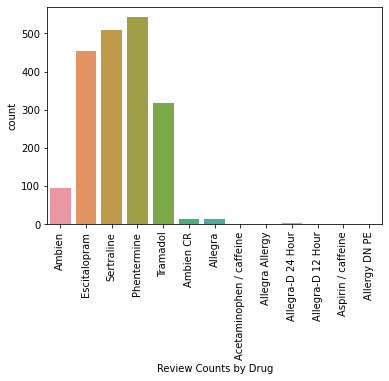

In [11]:
# Exploratory Data Analysis

df = pd.read_csv("case_study_data.txt", sep="\t", header=0)
df.head()
df.shape
df.info()
sns.countplot(df.drugName)
plt.xticks(rotation=90)
plt.xlabel('Review Counts by Drug');

In [24]:
df.drugName.values

array(['Ambien', 'Escitalopram', 'Sertraline', ..., 'Escitalopram',
       'Sertraline', 'Escitalopram'], dtype=object)

In [29]:
from transformers import pipeline                                                   
from transformers.pipelines.base import KeyDataset
import datasets
import tqdm                                                                         
import pandas as pd

pipe = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english")

df = pd.read_csv("case_study_data.txt", sep="\t", header=0)
l_0 = df["review"].to_list()
for out in pipe([l_0], batch_size=1000, padding="max_length", truncation=True):
    print("Overall:", out)

df_rx = df.set_index(["drugName"])

df_a = df_rx.loc["Ambien"]
l_a = df_a["review"].to_list()
for out in pipe([l_a], batch_size=1000, padding="max_length", truncation=True):
    print("Ambien:", out)
    
df_ac = df_rx.loc["Ambien CR"]
l_ac = df_ac["review"].to_list()
for out in pipe([l_ac], batch_size=1000, padding="max_length", truncation=True):
    print("Ambien CR:", out)

df_al = df_rx.loc["Allegra"]
l_al = df_al["review"].to_list()
for out in pipe([l_al], batch_size=1000, padding="max_length", truncation=True):
    print("Allegra:", out)
    
df_e = df_rx.loc["Escitalopram"]
l_e = df_e["review"].to_list()
for out in pipe([l_e], batch_size=1000, padding="max_length", truncation=True):
    print("Escitalopram:", out)
    
df_p = df_rx.loc["Phentermine"]
l_p = df_p["review"].to_list()
for out in pipe([l_p], batch_size=1000, padding="max_length", truncation=True):
    print("Phentermine:", out)
    
df_s = df_rx.loc["Sertraline"]
l_s = df_s["review"].to_list()
for out in pipe([l_s], batch_size=1000, padding="max_length", truncation=True):
    print("Sertraline:", out)

df_t = df_rx.loc["Tramadol"]
l_t = df_t["review"].to_list()
for out in pipe([l_t], batch_size=1000, padding="max_length", truncation=True):
    print("Tramadol:", out)



Overall: {'label': 'NEGATIVE', 'score': 0.9016236066818237}
Ambien: {'label': 'NEGATIVE', 'score': 0.9016236066818237}
Ambien CR: {'label': 'POSITIVE', 'score': 0.9869000315666199}
Allegra: {'label': 'NEGATIVE', 'score': 0.9997695088386536}
Escitalopram: {'label': 'POSITIVE', 'score': 0.9821180105209351}
Phentermine: {'label': 'POSITIVE', 'score': 0.5238568782806396}
Sertraline: {'label': 'POSITIVE', 'score': 0.9956830739974976}
Tramadol: {'label': 'NEGATIVE', 'score': 0.9994975328445435}


In [43]:
from transformers import pipeline                                                   
# from transformers.pipelines.base import KeyDataset
import datasets
import tqdm                                                                         
import pandas as pd

pipe = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english")

df = pd.read_csv("case_study_data.txt", sep="\t", header=0)
l_0 = df["review"].to_list()
for out in pipe([l_0], batch_size=1000, padding="max_length", truncation=True):
    print("Overall:", out)

Overall: {'label': 'NEGATIVE', 'score': 0.9016236066818237}


Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc.

@inproceedings{Gardner2017AllenNLP,
  title={AllenNLP: A Deep Semantic Natural Language Processing Platform},
  author={Matt Gardner and Joel Grus and Mark Neumann and Oyvind Tafjord
    and Pradeep Dasigi and Nelson F. Liu and Matthew Peters and
    Michael Schmitz and Luke S. Zettlemoyer},
  year={2017},
  Eprint = {arXiv:1803.07640},
}

Broader Impact Data Services, LLC &copy; 2021